
# **Лабораторная работа №1**



## 1. Текстовое описание датасета

---



В качестве набора данных будем использовать [набор данных по классификации цветков ирисов](https://archive.ics.uci.edu/ml/datasets/iris)

Набор данных содержит следующие колонки:


*   sepal length (cm) - длина чашелистика в см
*   sepal width (cm) - ширина чашелистика в см
*   petal length (cm) - длина лепестка в см
*   petal width (cm) - ширина лепестка в см
*   target - целевой признак, определяющий, к какому виду относится цветок: 

> 0 - Iris Setosa
>
> 1 - Iris Versicolor
>
> 2 - Iris Virginica




In [1]:
%pip install -q seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
sns.set_palette(sns.cubehelix_palette())
from sklearn.datasets import *

Импортируем библиотеки с помощью команды import:

Загрузим датасет с помощью библиотеки Pandas:

In [3]:
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

## 2. Основные характеристики датасета

---



In [4]:
# Первые 5 строк датасета
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
# Размер датасета - 150 строк, 5 колонок
data.shape

(150, 5)

In [6]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 150


In [7]:
# Список колонок
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [8]:
# Список колонок с типами данных
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target               float64
dtype: object

In [9]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

sepal length (cm) - 0
sepal width (cm) - 0
petal length (cm) - 0
petal width (cm) - 0
target - 0


In [10]:
# Основные статистические характеристки набора данных
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
# Определим уникальные значения для целевого признака
data['target'].unique()
# Целевой признак содержит только значения 0, 1 и 2

array([0., 1., 2.])

## 3. Визуальное исследование датасета

---


Проверим зависимость длины чашелистика и длины лепестка:

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

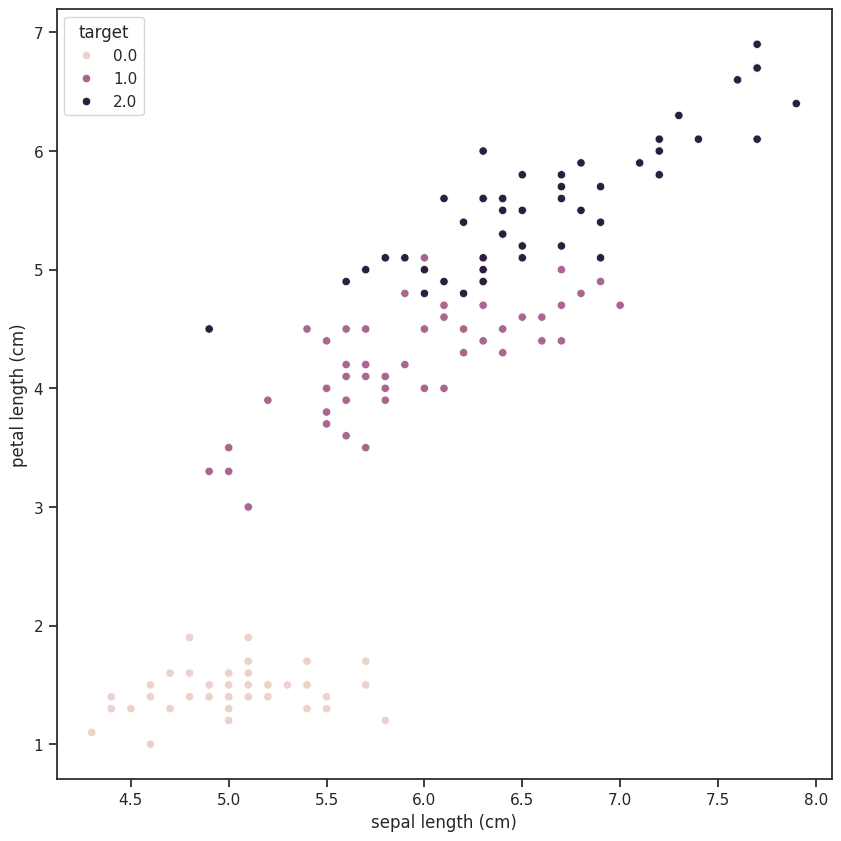

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='sepal length (cm)', y='petal length (cm)', data=data, hue='target')

Плотность вероятности распределения длины чашелистиков:

<AxesSubplot:xlabel='sepal length (cm)', ylabel='Count'>

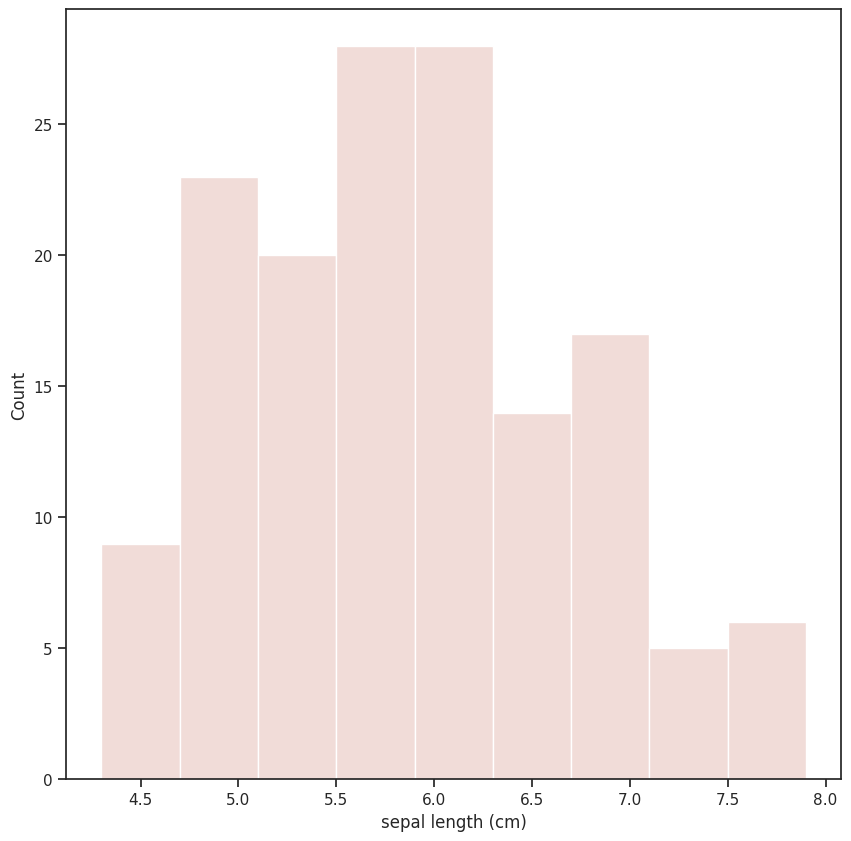

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.histplot(data['sepal length (cm)'])

Проверим зависимость ширины чашелистика и ширины лепестка:

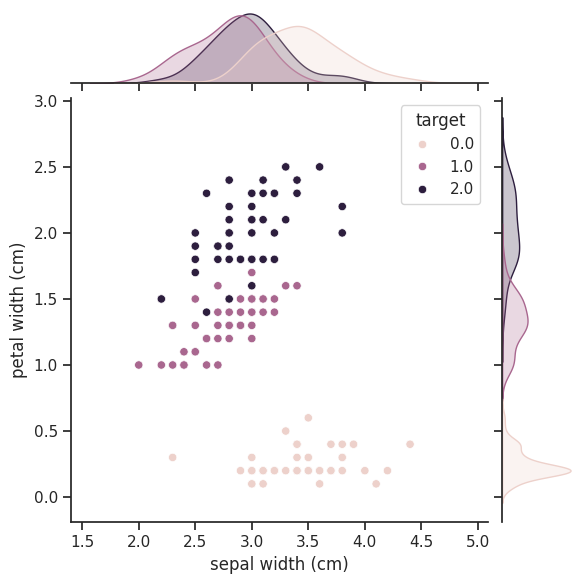

In [17]:
sns.jointplot(x='sepal width (cm)', y='petal width (cm)', data=data, hue='target')

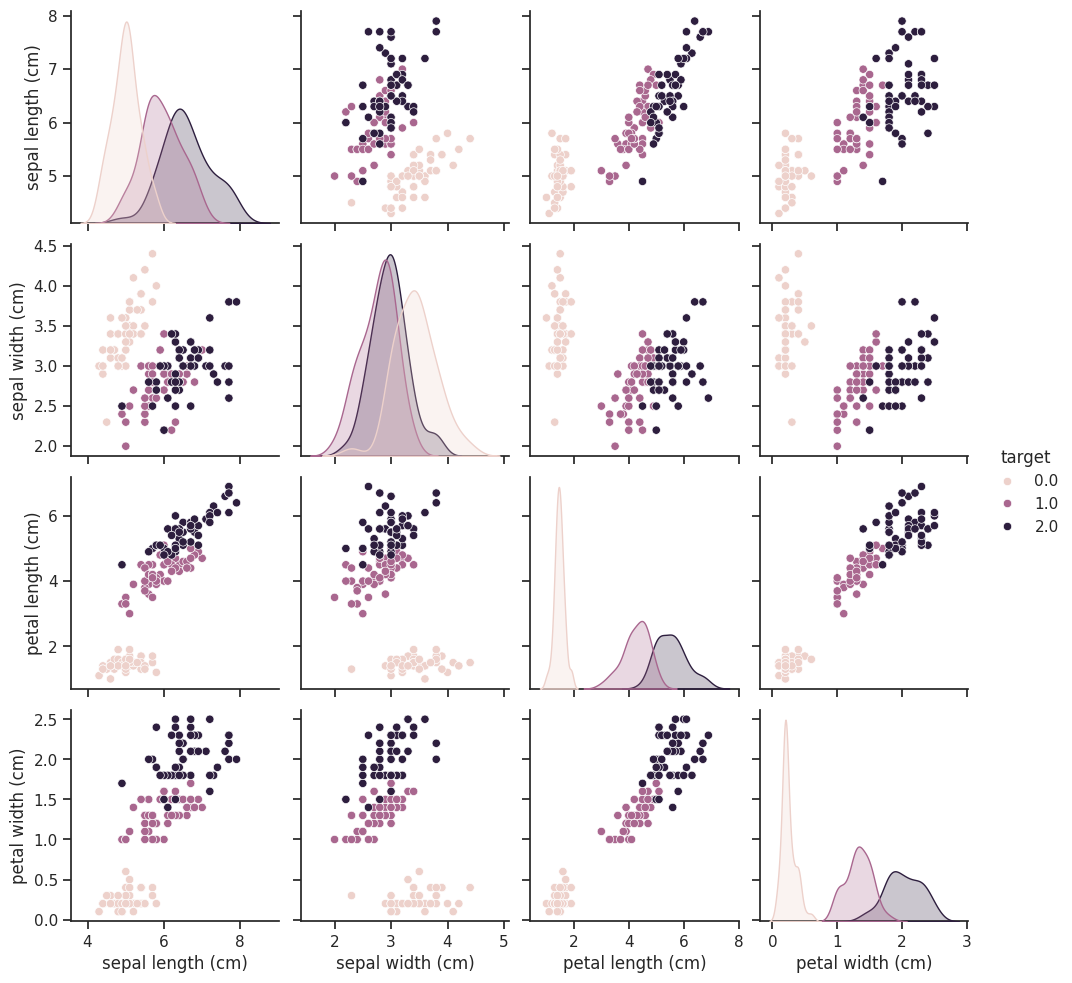

In [18]:
sns.pairplot(data=data, hue='target')

<AxesSubplot:xlabel='target', ylabel='petal length (cm)'>

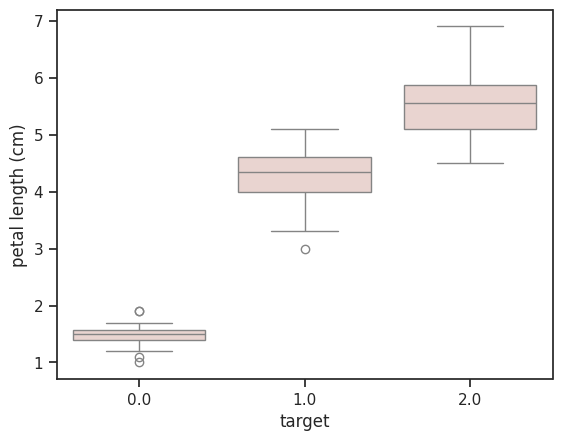

In [19]:
sns.boxplot(x='target', y='petal length (cm)', data=data)

<AxesSubplot:xlabel='target', ylabel='petal width (cm)'>

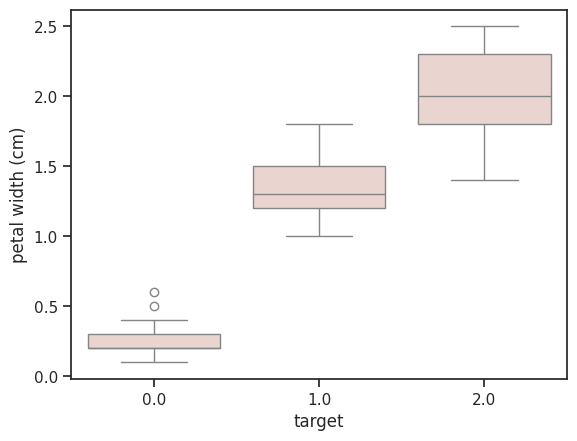

In [20]:
sns.boxplot(x='target', y='petal width (cm)', data=data)

<AxesSubplot:xlabel='target', ylabel='sepal length (cm)'>

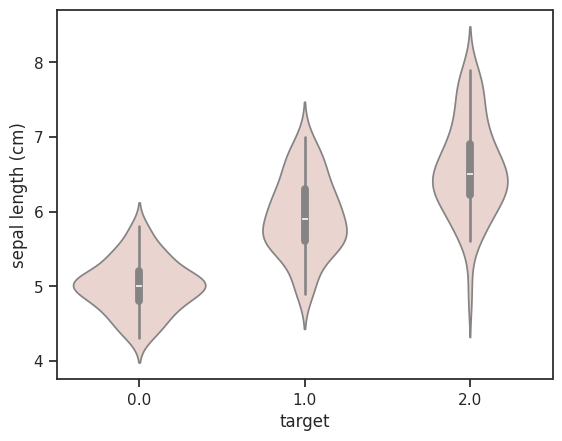

In [21]:
sns.violinplot(x='target', y='sepal length (cm)', data=data)

<AxesSubplot:xlabel='target', ylabel='sepal width (cm)'>

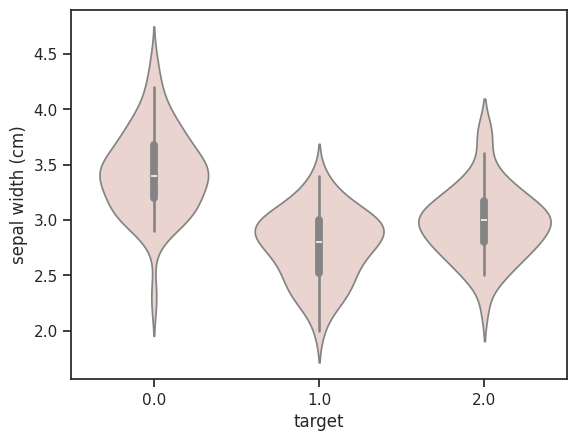

In [22]:
sns.violinplot(x='target', y='sepal width (cm)', data=data)

## 4) Информация о корреляции признаков

---



Проверка корреляции признаков позволяет решить две задачи:

*  Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком ('target'). Именно эти признаки будут наиболее информативными для моделей машинного обучения. 

*  Понять какие нецелевые признаки линейно зависимы между собой. 



In [23]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


На основе корреляционной матрицы можно сделать следующие выводы:

* Целевой признак наиболее сильно коррелирует с шириной лепестков (0.96) и их длиной (0.95). Эти признаки обязательно следует оставить в модели.

* Целевой признак достаточно сильно коррелирует с длиной чашелистика (0.78). Этот признак стоит также оставить в модели.

* Длина и ширина лепестков очень сильно коррелируют между собой (0.96). Это неудивительно, ведь форма лепестков примерно одинакова, различен только их размер.





Для визуализации корреляционной матрицы используем "тепловую карту":

<AxesSubplot:>

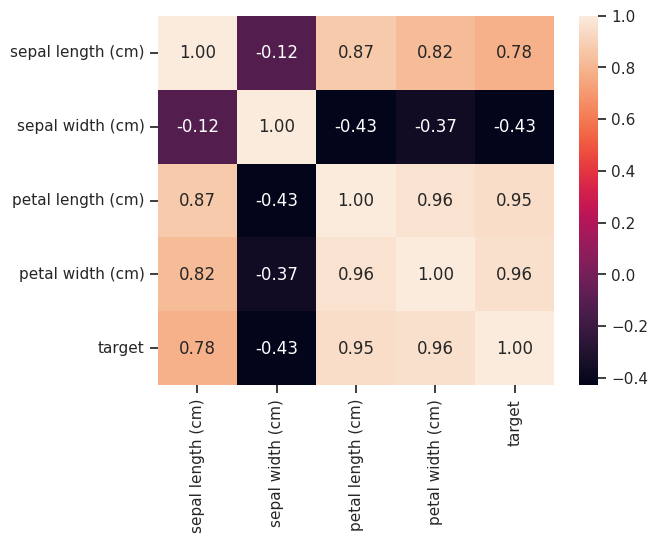

In [24]:
sns.heatmap(data.corr(), annot=True, fmt='.2f')

<AxesSubplot:>

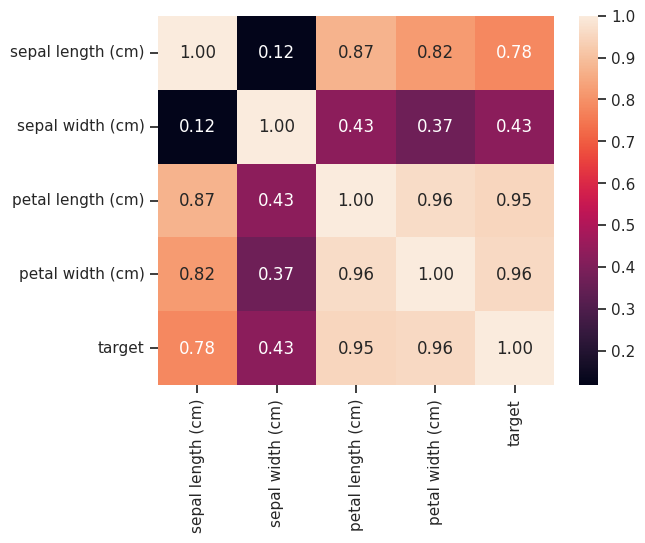

In [25]:
sns.heatmap(data.corr().abs(), annot=True, fmt='.2f')

Корреляционные матрицы, построенные разными методами:

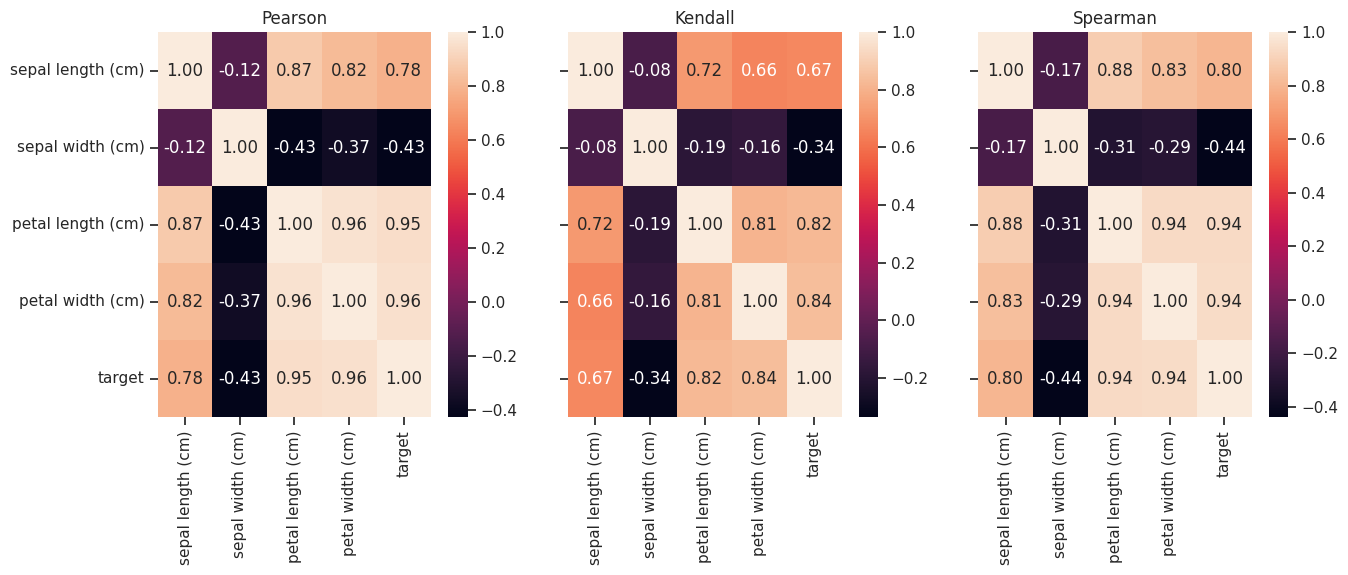

In [26]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

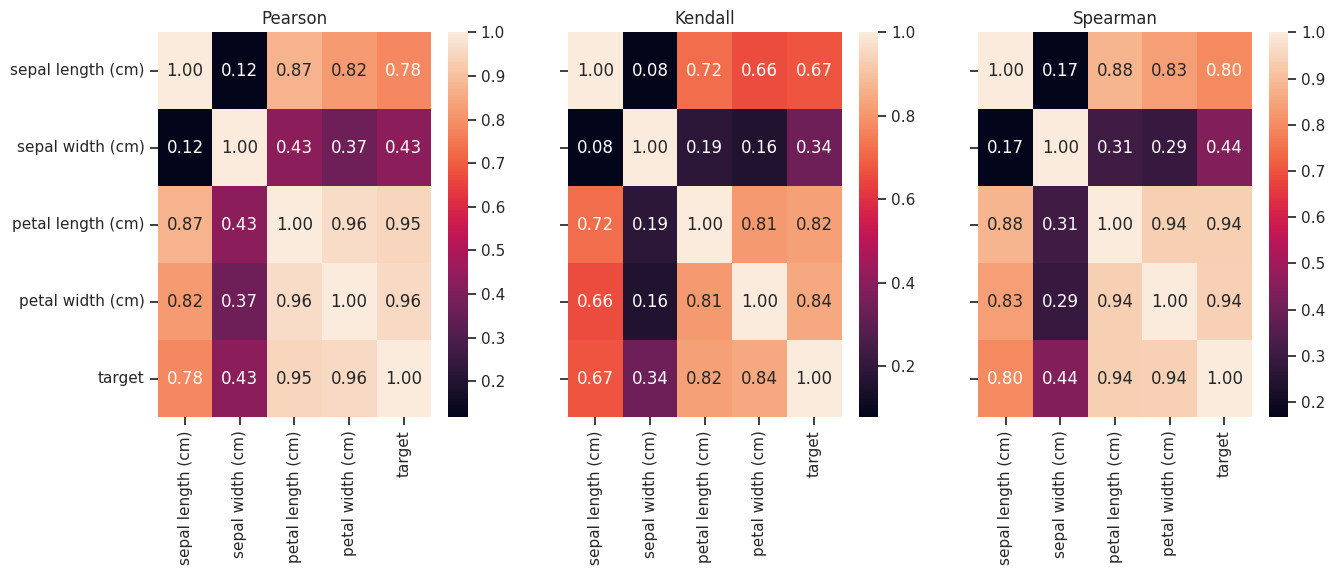

In [27]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson').abs(), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall').abs(), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman').abs(), ax=ax[2], annot=True, fmt='.2f')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')